In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('income_evaluation.csv' )
df.isnull().any()

age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income            False
dtype: bool

In [12]:
df = df.rename(columns={'age': 'age',
                         ' workclass': 'workclass',
                         ' fnlwgt': 'final_weight',
                         ' education': 'education',
                         ' education-num': 'education_num',
                         ' marital-status': 'marital_status',
                         ' occupation': 'occupation',
                         ' relationship': 'relationship',
                         ' race': 'race',
                         ' sex': 'sex',
                         ' capital-gain': 'capital_gain',
                         ' capital-loss': 'capital_loss',
                         ' hours-per-week': 'hrs_per_week',
                         ' native-country': 'native_country',
                         ' income': 'income'
                        })
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

In [16]:
df['income'].head()
df.head(10)


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [17]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [22]:
df['income'].unique()
df['income_encoded'] = [1 if value == ' >50K' else 0 for value in df['income'].values]
df['income_encoded'].unique()
# Let's check some descriptive statistics


array([0, 1], dtype=int64)

In [23]:
df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hrs_per_week,income_encoded
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [32]:
df[df['income'] == ' >50K']['occupation'].value_counts()


 Exec-managerial      1968
 Prof-specialty       1859
 Sales                 983
 Craft-repair          929
 Adm-clerical          507
 Transport-moving      320
 Tech-support          283
 Machine-op-inspct     250
 Protective-serv       211
 ?                     191
 Other-service         137
 Farming-fishing       115
 Handlers-cleaners      86
 Priv-house-serv         1
 Armed-Forces            1
Name: occupation, dtype: int64

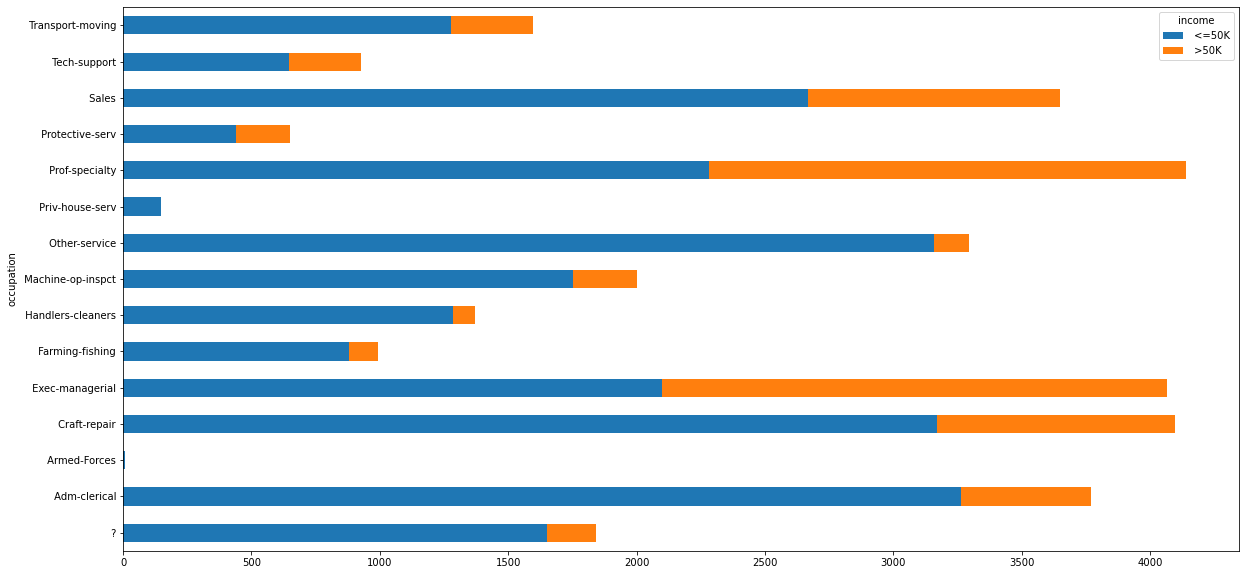

In [29]:
pd.crosstab(df["occupation"], df['income']).plot(kind='barh', stacked=True, figsize=(20, 10))